# **Análise Exploratória: Inadimplência** 



# **1\. Introdução ao problema**

Estamos analisando uma base de dados de uma instituição financeira e queremos estudar as características de um cliente inadimplente, isto é, em quais circuntâncias este cliente deixa de arcar com suas dívidas quando comparados a clientes adimplentes. Nossa variável dependente será, portanto, aquela descrita pela coluna "Default" em que adimplentes são rotulados por '0' e inadimplentes por '1'.

# **2\. Carregamento e Exploração dos Dados**

Nesta estapa faremos o carregamento dos dados e uma análise exploratória incial com o intuito de obter mais informações a respeito de nosso dataset.

In [1]:
#importação de pacotes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#carregamento dos dados

df = pd.read_csv("https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv", na_values = 'na')



In [2]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [3]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [4]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


In [5]:
#Analisando algumas informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

Note que as colunas **limite_credito** e **valor_transacoes_12m** estão sendo interpretadas como contendo valores categóricos (dtype = object) sendo que deveriam ser tratadas como contendo valores do tipo numérico. Além disso, já podemos perceber que algumas colunas possuem dados faltantes.

In [6]:
#Verificando quais colunas possuem dados faltantes
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [7]:
#Analisando as proporções de inadimplência e adimplência nas colunas para as quais existem dados faltantes

def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [8]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [9]:
stats_dados_faltantes(df=df[df['default']==0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [10]:
stats_dados_faltantes(df=df[df['default']==1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Note que as proporções dessas quantidades faltantes se mantêm aproximadamente iguais tanto no caso de inadimplência ('default'=1) quanto no caso de adimplência ('default'=0). Ou seja, ambas as classes são afetadas aproximadamente da mesma maneira pela ausência de dados.

# **3\. Transformação e limpeza dos dados**

Com a exploração iniciada acima, vemos que o primeiro passo a ser tomado consiste na transformação dos dados erroneamente classificados como categóricos em numéricos. Para isso, abaixo iremos transformar os valores presentes nessas colunas para o formato onde casas decimais são colocadas depois de um ponto, e não uma vírgula. 

In [11]:
#Função para formatação adequada de casas decimais
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Vamos verificar agora se as colunas **limite_credito** e **valor_transacoes_12m** foram transformadas corretamente e também acessar algumas estatísticas relevantes das colunas numéricas.

In [12]:
df.drop(['id','default'], axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Vimos que as colunas foram transformadas corretamente para o tipo numérico. Agora, vamos tratar os dados faltantes. Como vimos na seção anterior, os dados ausentes se mantêm proporcionais para as duas classes de interesse (adimplentes e inadimplentes). Portanto, podemos simplesmente removê-los sem que isso introduza um desbalanceamento extra aos dados.

In [13]:
df.dropna(inplace=True)
nova_qtd_total,_ = df.shape

In [14]:
print(f"Quantidade de linhas retiradas: {qtd_total-nova_qtd_total}.")

Quantidade de linhas retiradas: 3046.


# **4\. Análise e Visualização dos Dados** 

Vamos agora analisar as características que podem ser indicadoras de inadimplência. Começaremos pelas quantidades categóricas e então analisaremos as quantidades numéricas. Note que não usaremos a coluna **sexo** do nosso dataset pois não queremos introduzir um viés de gênero em nossas análises.

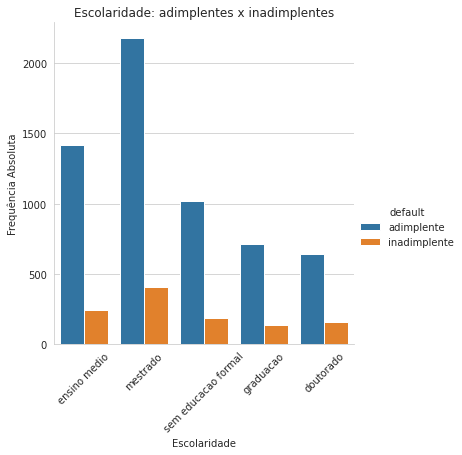

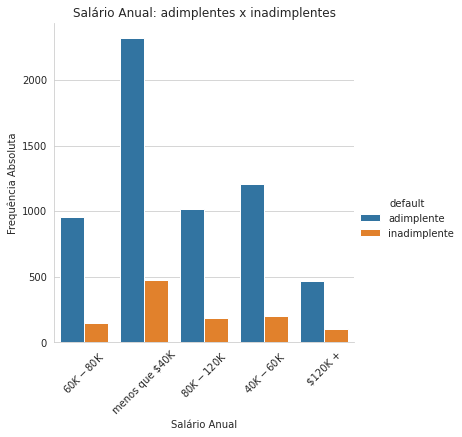

In [15]:
#Visualização dados categóricos
sns.set_style("whitegrid")

df.replace({'default':{1:'inadimplente',0:'adimplente'}}, inplace=True) 

f = sns.catplot(x='escolaridade', data=df, hue='default', kind='count')
f.set(title='Escolaridade: adimplentes x inadimplentes', xlabel='Escolaridade', ylabel='Frequência Absoluta')
f.set_xticklabels(rotation=45)

f = sns.catplot(x='salario_anual', data=df, hue='default', kind='count')
f.set(title='Salário Anual: adimplentes x inadimplentes', xlabel='Salário Anual', ylabel='Frequência Absoluta')
f.set_xticklabels(rotation=45)



Podemos observar acima que nem o salário anual e nem a escolaridade parecem ser características relevantes para selecionar clientes inadimplentes, dado que o tamanho das barras varia aproximadamente de maneira igual para ambas as classes. Interessante notar que, intuitivamente, o salário anual poderia ser considerado decisivo para a distinção entre adimplentes e inadimplentes e, no entanto, os dados não corroboram essa premissa. 

In [16]:
#Visualização de dados numéricos

sns.set_style("whitegrid")

df_adimplente = df[df['default'] == 'adimplente']
df_inadimplente = df[df['default'] == 'inadimplente']

df.drop(['id', 'default'], axis=1).select_dtypes('number').head()

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


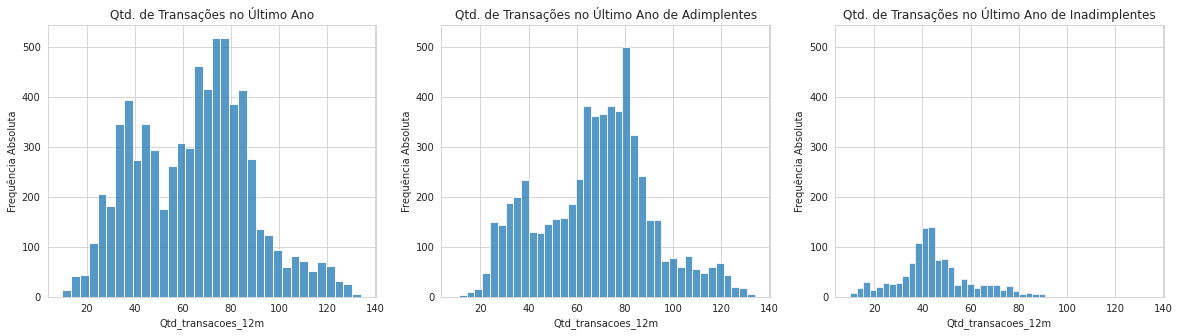

In [17]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Aqui podemos observar uma distinção clara entre as duas classes de clientes: os adimplentes tem um pico de transações anuais entre 60 e 90, aproximadamente, enquanto os inadimplentes possuem um pico entre 30 e 60. Ou seja, clientes inadimplentes tendem a realizar menos transações. Nesse último caso, seria indicado que a instituição financeira buscasse alcançar este perfil de cliente oferecendo uma possibilidade de negociação de juros e condições especiais de pagamento além de oferecer um limite de crédito mais baixo a futuros clientes similares.

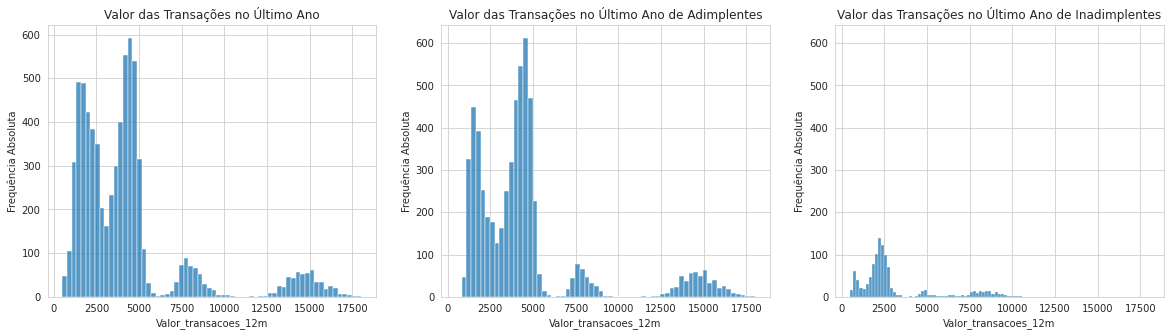

In [18]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Vemos através destes gráficos que o valor das transações no último ano também parece ser uma característica relevante na distinção entre as classes de clientes. Os inadimplentes possuem um pico bem pronunciado para valores cumulativos de transações entre aproximadamente 500,00 e 3.000,00. 

Como as duas características analisadas acima se mostraram relevantes na indicação de inadimplência, vamos visualizar a relação entre elas em um único gráfico com intuito de localizar nesse plano onde se localizam os clientes inadimplentes.

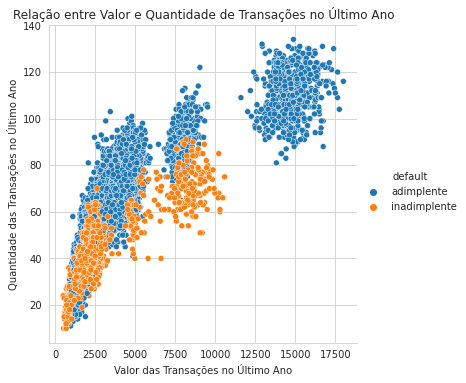

In [19]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

Podemos verificar no gráfico acima que há um grupo concentrado de clientes adimplentes para altos valores de transação e alta quantidade de transações. Para tentar contornar inadimplência, a instituição deve se concentrar em acompanhar mais de perto clientes concentrados em dois grupos: aquele para o qual o número de transações do último ano está abaixo de 60 e cuja soma dos valores das transações se concentra em torno de 2.500,00 e aquele para o qual o número de transações do último ano está entre 60 e 80 e cuja soma dos valores das transações se concentra entre 7.000,00 e 10.000,00.

Vamos analisar abaixo outra característica numérica que se mostrou relevante na distinção entre inadimplência e adimplência, a quantidade de produtos do cliente.

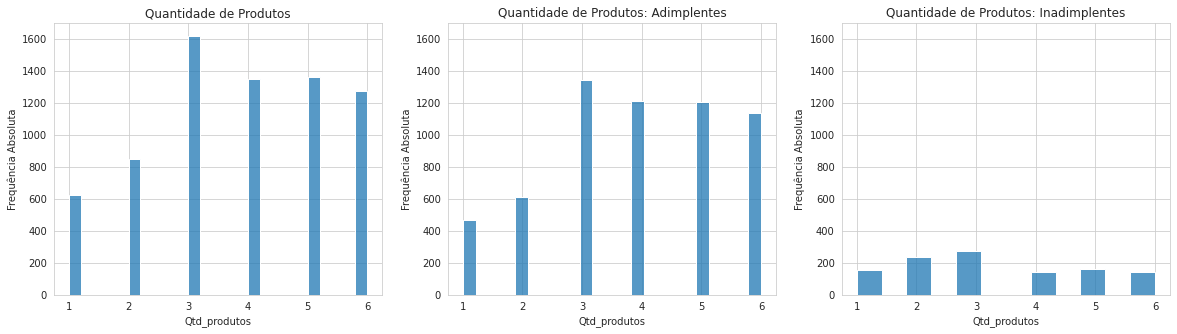

In [20]:
#Quantidade de produtos
coluna = 'qtd_produtos'
titulos = ['Quantidade de Produtos', 'Quantidade de Produtos: Adimplentes', 'Quantidade de Produtos: Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(dataframe, x=coluna, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Aqui podemos perceber que clientes inadimplentes tendem a não adquirir mais de 3 produtos, enquanto clientes adimplentes possuem, em sua maioria, 3 ou mais produtos. Seria interessante que a instituição financeira incentivasse o cliente a obter outros produtos, diminuindo seus respectivos custos, com o intuito de engajar mais o cliente com seus serviços.

# **5\. Conclusões e insights**

Foi possível observar com esta análise que as quantidades mais significativas para a indicação de inadimplência são a **quantidade de transações do último ano**, o **valor das transações do último ano** e a **quantidade de produtos** possuídos pelo cliente. Sendo assim, é sugerido à instituição financeira os seguintes procedimentos:

1. acompanhar mais de perto e oferecer juros e condições especiais de pagamentos à clientes concentrados em dois grupos: aquele para o qual o número de transações do último ano está abaixo de 60 e cuja soma do valor das transações se concentra em torno de 2.500,00 e aquele para o qual o número de transações do último ano está entre 60 e 80 e cuja soma do valor das transações se concentra entre 7.000,00 e 10.000,00. Para futuros clientes com o mesmo perfil, oferecer um limite de crédito menor;

2. incentivar o cliente a obter diversos produtos, diminuindo seus respectivos custos, com o intuito de engajar mais o cliente com seus serviços;

3. clientes com mais de 90 transações anuais de valor cumulativo superior à 12.550,00 não oferecem risco significativo de inadimplência.